In [97]:
import torch
from PIL import Image
import torchvision.transforms as T
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import visualize_tools
import numpy as np
from vitWrapper import ViTWrapper
from denoiser import Denoiser

In [98]:
img = Image.open('fig/01.png').convert('RGB')
# single_image_visualize(model,img,1024//14,1280//14)

In [99]:
vit = ViTWrapper('vit_base_patch14_dinov2.lvd142m',stride=14)

In [100]:
model = Denoiser(noise_map_height=37, noise_map_width=37,vit=vit,feature_dim=768)
freevit_model_ckpt = torch.load('/bd_byta6000i0/users/dataset/feat_visualize_models/dinov2_v1.pth')["denoiser"]
model.load_state_dict(freevit_model_ckpt,strict=False)

_IncompatibleKeys(missing_keys=['vit.model.cls_token', 'vit.model.pos_embed', 'vit.model.patch_embed.proj.weight', 'vit.model.patch_embed.proj.bias', 'vit.model.blocks.0.norm1.weight', 'vit.model.blocks.0.norm1.bias', 'vit.model.blocks.0.attn.qkv.weight', 'vit.model.blocks.0.attn.qkv.bias', 'vit.model.blocks.0.attn.proj.weight', 'vit.model.blocks.0.attn.proj.bias', 'vit.model.blocks.0.ls1.gamma', 'vit.model.blocks.0.norm2.weight', 'vit.model.blocks.0.norm2.bias', 'vit.model.blocks.0.mlp.fc1.weight', 'vit.model.blocks.0.mlp.fc1.bias', 'vit.model.blocks.0.mlp.fc2.weight', 'vit.model.blocks.0.mlp.fc2.bias', 'vit.model.blocks.0.ls2.gamma', 'vit.model.blocks.1.norm1.weight', 'vit.model.blocks.1.norm1.bias', 'vit.model.blocks.1.attn.qkv.weight', 'vit.model.blocks.1.attn.qkv.bias', 'vit.model.blocks.1.attn.proj.weight', 'vit.model.blocks.1.attn.proj.bias', 'vit.model.blocks.1.ls1.gamma', 'vit.model.blocks.1.norm2.weight', 'vit.model.blocks.1.norm2.bias', 'vit.model.blocks.1.mlp.fc1.weight', '

In [101]:
model = model.to('cuda')

In [102]:
img.size

(860, 480)

In [103]:
img = Image.open('fig/04.png').convert('RGB')
# single_image_visualize(model,img,1024//14,1280//14)

In [104]:
transform = T.Compose([
    T.Resize((518, 518),T.InterpolationMode.BICUBIC),
    T.CenterCrop((518, 518)),
    T.ToTensor(),
    # T.Normalize(mean=[0.5], std=[0.5]),
    # T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])
raw_img = transform(img)[:3].unsqueeze(0)
raw_img = raw_img.to('cuda')

In [105]:
transform = T.Compose([
    T.Resize((518, 518),T.InterpolationMode.BICUBIC),
    T.CenterCrop((518, 518)),
    T.ToTensor(),
    # T.Normalize(mean=[0.5], std=[0.5]),
    # T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])
# print(transform)
img = transform(img)[:3].unsqueeze(0)
img = img.to('cuda')

In [106]:
features = model.forward(img,return_dict=True)

In [107]:
raw_features = features['raw_vit_feats']
denoised_features = features['pred_denoised_feats']

In [108]:
raw_features.shape

torch.Size([1, 37, 37, 768])

In [109]:
from visualize_tools import get_pca_map, get_cluster_map

In [110]:
with torch.no_grad():
    pca = get_pca_map(raw_features,img_size=(518,518))
    d_pca = get_pca_map(denoised_features,img_size=(518,518))

In [111]:
kmeans = get_cluster_map(raw_features, img_size=(518,518),num_clusters=10)
d_kmeans = get_cluster_map(denoised_features, img_size=(518,518),num_clusters=10)

In [112]:
topic = T.ToPILImage()

In [113]:
out = torch.cat((raw_img[0].cpu(),torch.from_numpy(pca).permute(2,0,1),torch.from_numpy(d_pca).permute(2,0,1),torch.from_numpy(kmeans).permute(2,0,1),torch.from_numpy(d_kmeans).permute(2,0,1)),dim=2)

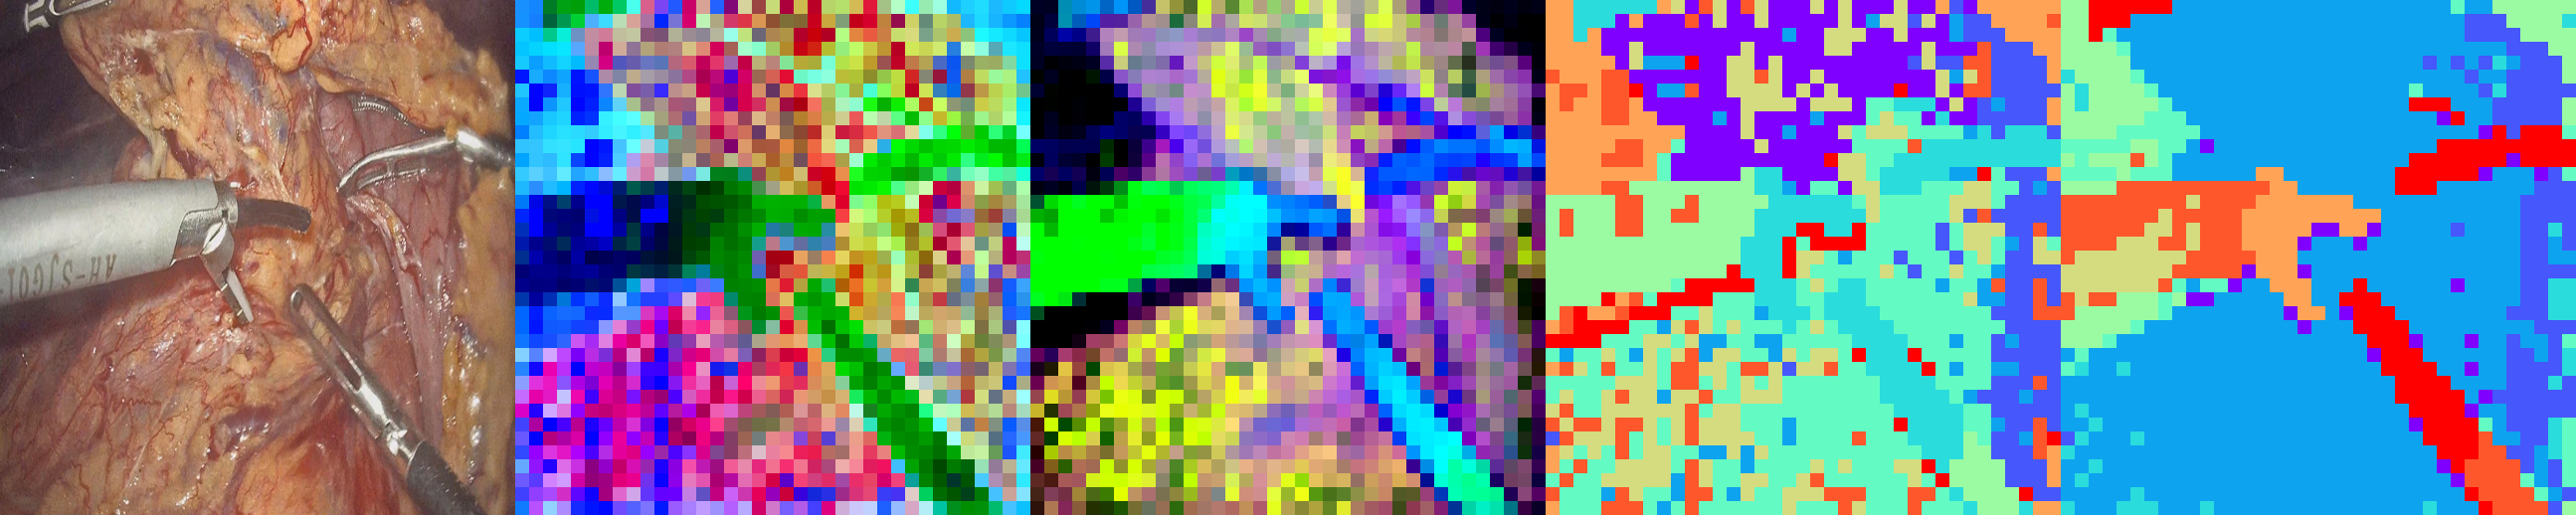

In [114]:
topic(out)

In [1]:
import os

# 假设我们有一个文件路径
file_path = 'example_folder/your_file.py'

# 使用os.path.splitext()函数来分割文件名和后缀
file_name_without_extension, file_extension = os.path.splitext(file_path)

# 打印不包含后缀的文件名
print(file_name_without_extension)

example_folder/your_file


In [2]:
file_extension

'.py'

In [3]:
1312 // 11 * 11

1309

In [4]:
os.listdir('fig')

['03.png', '04.png', '01.png', '05.png', '02.png', '06.png']